# Карта оценки ледовой обстановки

###  На сайте «Арктического и антарктического научно-исследовательского института (ААНИИ) размещены данные ледовой обстановки.
Представлены комплексные карты ледовой обстановки Баренцева и Карского морей России. 

В летний период (1.06-30.09) карты отражают распределение льда по обобщенным градациям сплоченности 1-3, 4-6, 7-8 и 9-10 баллов, 

в зимний период (1.11-31.05) - распределение льда по градациям возраста (толщины льда) - ниласовые, молодые, однолетние (тонкие, средние, толстые) и старые. 

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import timeit
import datetime
import warnings
from itertools import product
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'
from shapely.geometry import LineString
from ipyleaflet import (
    Map,
    Marker,
    TileLayer,Polygon,Polyline
)
import ipyleaflet as il
import matplotlib as mpl
import dutils

INPUT='g:/neft/test/'

Populating the interactive namespace from numpy and matplotlib
2018 8 3 15 43 23


In [2]:
def plot_legend(cols,name_column='Name',all_name=True):
    n = cols.shape[0]
    ncols = 1
    nrows = n // ncols + 1

    fig, ax = plt.subplots(figsize=(8, 5))

    # Get height and width
    X, Y = fig.get_dpi() * fig.get_size_inches()
    h = Y / (nrows + 1)
    w = X / ncols
    colors=cols[name_column].unique()
    for i,name in enumerate(colors):
        #print(i)
        #name = cols.loc[cols.index==i,name_column].values[0]
        #name = name + cols.loc[cols.index==i,'Thickness'].values[0]
        fcolor = mpl.colors.rgb2hex(cols.loc[cols[name_column]==name,['color1','color2','color3']].values[0]/255.)
        
        if all_name:
            fname = cols.loc[cols[name_column]==name,'all_name'].values[0]
        else:
            fname=name
        
        col = i % ncols
        row = i // ncols
        y = Y - (row * h) - h

        xi_line = w * (col + 0.05)
        xf_line = w * (col + 0.25)
        xi_text = w * (col + 0.3)

        ax.text(xi_text, y, fname, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

        ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=fcolor, linewidth=(h * 0.6))

    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_axis_off()

    fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
    plt.show()

In [11]:
def map_ice_thick(df,m,cols):
    lat = 73.
    lon = 45.748445
    center = [lat, lon]
    zoom = 2
    #m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    for i in range(df.shape[0]):
        bounds=df.geometry.values[i]
        crd=bounds.exterior.coords.array_interface()['data']
        shapes=bounds.exterior.coords.array_interface()['shape']
        crd1=[]
        for j in range(0,shapes[0]*2,2):
            crd1.append((crd[j+1],crd[j]))
        
        #print(i)
        #if i not in [117,120]:
        #if i not in [108]:
        cid=df.loc[df.index==i,'SA'].values[0]
        if cid=='-9':   
            fcolor = mpl.colors.rgb2hex(cols.loc[cols.SA==0,['color1','color2','color3']].values[0]/255.)
        else:
            fcolor = mpl.colors.rgb2hex(cols.loc[cols.SA==np.int(cid),['color1','color2','color3']].values[0]/255.)
        
        pg = il.Polygon(locations=crd1, weight=1,
            color='white', opacity=0.8, fill_opacity=0.5,
            fill_color=fcolor
             )
        m += pg
    

def map_ice_conc(df,m,cols):
    lat = 73.
    lon = 45.748445
    center = [lat, lon]
    zoom = 2
    #m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    for i in range(df.shape[0]):
        bounds=df.geometry.values[i]
        crd=bounds.exterior.coords.array_interface()['data']
        shapes=bounds.exterior.coords.array_interface()['shape']
        crd1=[]
        for j in range(0,shapes[0]*2,2):
            crd1.append((crd[j+1],crd[j]))
        
       
        cid=df.loc[df.index==i,'CT'].values[0]
        if cid=='-9':   
            fcolor = mpl.colors.rgb2hex(cols.loc[cols.CT==0,['color1','color2','color3']].values[0]/255.)
        else:
            fcolor = mpl.colors.rgb2hex(cols.loc[cols.CT==np.int(cid),['color1','color2','color3']].values[0]/255.)
        
        pg = il.Polygon(locations=crd1, weight=1,
            color='white', opacity=0.8, fill_opacity=0.5,
            fill_color=fcolor
            
                       )
        m += pg
    
    
def map_thick(df1,df2,cols):
    lat = 73.
    lon = 45.748445
    center = [lat, lon]
    zoom = 4
    m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    map_ice_thick(df1,m,cols)
    map_ice_thick(df2,m,cols)
    display(m)
    return m
    
def map_conc(df1,df2,cols):
    lat = 73.
    lon = 45.748445
    center = [lat, lon]
    zoom = 4
    m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
    map_ice_conc(df1,m,cols)
    map_ice_conc(df2,m,cols)
    display(m)
    return m

def map_load_data():
    print("Загрузка данных ...")
    df1,df2 = dutils.download_last() 
    col1=pd.read_csv(INPUT+"colors1.csv",encoding='cp1251')
    col2=pd.read_csv(INPUT+"colors2.csv",encoding='cp1251')
    col1['all_name']=col1['Name']+' '+col1['Thickness']
    col2['all_name']=col2['Name']+' '+col2['Concentration']
    return df1,df2,col1,col2

def map_ice():
    df1,df2,col1,col2 = map_load_data()
    mnow=datetime.datetime.now()
    mm=mnow.month
    if mm in [6,7,8,9]:
        print ("Летний период. Карта сплоченности льда")
        print ("Легенда: ")
        plot_legend(col2,all_name=False)
        m = map_conc(df1,df2,col2)
        map_path_con_1_2(m,df1,df2,col2)
    else:
        print ("Зимний период. Карта возраста и толщины льда")
        print ("Легенда: ")
        plot_legend(col1,all_name=False)
        m = map_thick(df1,df2,col1)
        map_path_thick_1_2(m,df1,df2,col1)

In [17]:
def map_line(line,m):
    bounds=line
    crd=bounds.coords.array_interface()['data']
    shapes=bounds.coords.array_interface()['shape']
    crd1=[]
    for j in range(0,shapes[0]*2,2):
        crd1.append((crd[j],crd[j+1]))
    pl = il.Polyline(locations=crd1, weight=1,
            color='black'
                        
                       )
    m += pl

def get_path():
    line0 = LineString([(69.529314, 73.222918), (74.084109, 71.693754)])
    line01 = LineString([(74.084109, 71.693754),(70.495273, 58.073397)])
    line02 = LineString([(74.084109, 71.693754),(76.955677, 68.591679)])
    line1 = LineString([#(69.529314, 73.222918), 
                    (71.507361, 72.547877),
                    (72.735372, 73.514674),# Обская губа (выход)
                    (73.300396, 72.635767), #Обская губа (поворот)
                                            (73.650551, 71.625025),
                                            (73.699986, 69.823267),
                                            (73.501368, 68.856471),
                    (70.495273, 58.073397), # Карские ворота
                    (69.467825, 33.801404),
                    (70.495273, 58.073397), # Карские ворота
                    (73.501368, 68.856471),
                     (73.699986, 69.823267),
                    (73.650551, 71.625025),
                    (73.300396, 72.635767), #Обская губа (поворот)
                    (72.735372, 73.514674),# Обская губа (выход)
                    (71.507361, 72.547877)
                   #,(69.529314, 73.222918)
                    ])
    line2 = LineString([
                    (71.507361, 72.547877),
                    (72.735372, 73.514674),# Обская губа (выход)
                    (73.300396, 72.635767), #Обская губа (поворот)
                    (76.779858, 69.750871), #мыс Желания (поворот)
                    (77.156515, 68.915910),
                    (77.244166, 67.773332),
                    (77.146740, 64.960832),
                    (77.127167, 62.631731),
                    (69.467825, 33.801404), #Мурманск
                    (77.127167, 62.631731),
                    (77.146740, 64.960832),
                    (77.244166, 67.773332),
                    (77.156515, 68.915910),
                    (76.779858, 69.750871), #мыс Желания (поворот)
                    (73.300396, 72.635767), #Обская губа (поворот)
                    (72.735372, 73.514674),# Обская губа (выход)
                    (71.507361, 72.547877)
    
                    #(69.529314, 73.222918), (74.084109, 71.693754),(76.955677, 68.591679),(69.467825, 33.801404)])
                    ])
    return line1,line2

def get_rec_con(mcode):
    if mcode>69:
        print("Самостоятельное плавание по мартшруту: ")
        print("  Ледоколы")
        print("  Защищенные суда (ледового класса Arc7)")
        print ()
        print("Слабозащищенные суда (до ледового класса Arc5) –  только в сопровождении ледокола")
        print ()
    else:   
        print("Самостоятельное плавание по мартшруту: ")
        print("  Ледоколы")
        print("  Защищенные суда (ледового класса Arc7)")
        print("  Слабозащищенные суда (ледового класса Arc4,Arc5)")
        print ()

def get_rec_thick(mcode):
    if mcode>92:
        print("Самостоятельное плавание по мартшруту: ")
        print("  Ледоколы")
        print("  Защищенные суда (ледового класса Arc7)")
        print ()
        print("Слабозащищенные суда (до ледового класса Arc5) –  только в сопровождении ледокола")
        print ()
    else:   
        print("Самостоятельное плавание по мартшруту: ")
        print("  Ледоколы")
        print("  Защищенные суда (ледового класса Arc7)")
        print("  Слабозащищенные суда (ледового класса Arc4,Arc5)")
        print ()
          
def max_con(df,line,col2):
    if np.int8(df.loc[df.geometry.crosses(line),'CT'].values).any():
        mcon = np.max(np.int8(df.loc[df.geometry.crosses(line),'CT'].values))
        mcon_name = col2.loc[col2['CT']==mcon,'Name'].values[0]
        return mcon, mcon_name
    else:
        return 0,'0'
          
def max_thick(df,line,col1):
    if np.int8(df.loc[df.geometry.crosses(line),'SA'].values).any():
        mthick = np.max(np.int8(df.loc[df.geometry.crosses(line),'SA'].values))
        mthick_name = col1.loc[col1['SA']==mthick,'Thickness'].values[0]
        return mthick, mthick_name
    else:
        return 0,'0'

def map_path_con(line,m,df1,df2,col2):
    map_line(line,m)
    mcode1,mname1 = max_con(df1,line,col2)
    mcode2,mname2 = max_con(df2,line,col2)
    print("Максимальная сплоченность по маршруту: {} в Карском море".format(mname2))
    print("Максимальная сплоченность по маршруту: {} в Баренцевом море".format(mname1))
    get_rec_con(np.maximum(mcode1,mcode2))
    
def map_path_thick(line,m,df1,df2,col1):
    map_line(line,m)
    mcode1,mname1 = max_thick(df1,line,col1)
    mcode2,mname2 = max_thick(df2,line,col1)
    print("Максимальная толщина льда по маршруту: {} в Карском море".format(mname2))
    print("Максимальная толщина льда по маршруту: {} в Баренцевом море".format(mname1))
    get_rec_thick(np.maximum(mcode1,mcode2))
          
def map_path_con_1_2(m,df1,df2,col2):
    line1,line2 = get_path()
    print ("Мартшрут №1. Обская губа - Карские ворота - Мурманск ")
    print ()
    map_path_con(line1,m,df1,df2,col2)
    print ("Мартшрут №2. Обская губа - Мыс Желания - Мурманск ")
    print ()
    map_path_con(line2,m,df1,df2,col2)

def map_path_thick_1_2(m,df1,df2,col1):
    line1,line2 = get_path()
    print ("Мартшрут №1. Обская губа - Карские ворота - Мурманск ")
    map_path_thick(line1,m,df1,df2,col1)
    print ("Мартшрут №2. Обская губа - Мыс Желания - Мурманск ")
    map_path_thick(line2,m,df1,df2,col1)
    



Загрузка данных ...
7
Летний период. Карта сплоченности льда
Легенда: 


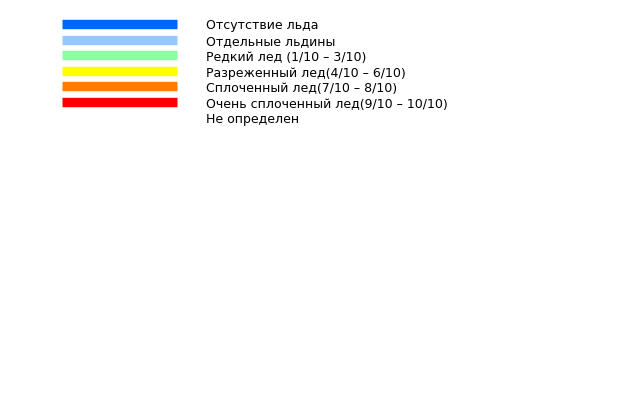

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[73.0, 45.748445], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), Polygon(color='white', fill_color='#ff0000', fill_opacity=0.5, locations=[(79.09097862794592, 59.67812352586357), (79.08712642226944, 59.60672195287285), (79.08175292915809, 59.53190102279969), (79.07488032439808, 59.45578042041364), (79.06683315191451, 59.382632862324655), (79.0578301492201, 59.31442820438003), (79.04809172695688, 59.2528056969006), (79.03330589149749, 59.17890620712212), (79.0269387192617, 59.15645426186597), (79.01950049401196, 59.136549985398375), (79.00234965353248, 59.10489236117716), (78.95666163686906, 59.043307603969765), (78.94497380826125, 59.01903223160947), (78.93569195935753, 58.99066512924433), (78.92332776313238, 58.931459457599075), (78.91050137485267, 58.85024496675012), (78.89854326103296, 58.75550892843043), (78.88810965820065, 58.65278936458833), (78.87820121264944, 58.52330522764165), (78.87474959607218, 58.46069767955585), (78.87237891479171, 58.4007993434231), (78.8711242325644, 58.34456832660039), (78.87098939553334, 58.29232752320496), (78.87197758525915, 58.244523305604154), (78.87408407124028, 58.20146380559694), (78.87911359501807, 58.147960740414106), (78.88641066271333, 58.109717657507574), (78.89693952480091, 58.073679887431005), (78.92428826567841, 57.995450099708215), (78.93453296465702, 57.9554085447363), (78.93778792039176, 57.93508180295328), (78.93965533569475, 57.91471190426103), (78.9403303630274, 57.890820133993), (78.93976715815414, 57.86491072625385), (78.93549981840329, 57.81160966431718), (78.92681656668628, 57.748354596094245), (78.89268400472028, 57.558627525593316), (78.86916175533175, 57.411435560681745), (78.83083033261669, 57.203543282262665), (78.81951748806017, 57.132232356318106), (78.8110047572049, 57.06599356809013), (78.80460408839971, 56.99815407094802), (78.80086744741848, 56.933184874042254), (78.79972192408435, 56.857542628379925), (78.80098650944448, 56.694561468932854), (78.80055251208654, 56.632414118230194), (78.7979464462543, 56.57770081102459), (78.79554119771373, 56.55585265759429), (78.79238359522068, 56.536819185429835), (78.7843168826903, 56.508902565642856), (78.77354286473603, 56.492055997723014), (78.75994564889871, 56.48604736816539), (78.74319824305546, 56.49068711963407), (78.71596712261311, 56.512447459118896), (78.65070066679553, 56.58188922030967), (78.6158946250636, 56.60484955422042), (78.59588069830673, 56.62163222281407), (78.52018780112833, 56.70291313362488), (78.48921385788945, 56.72998186015639), (78.46609930099343, 56.74244325477563), (78.41508500791043, 56.75638575504965), (78.39955394512037, 56.75543233409363), (78.38769504810345, 56.746533142713346), (78.38080765766556, 56.73456091149131), (78.37561844592436, 56.718329263490375), (78.3702781026757, 56.692366920218845), (78.36521276059217, 56.657805913349925), (78.36037307527998, 56.61395533186245), (78.35596641034029, 56.56232090963611), (78.35207924599115, 56.50395445289429), (78.34881375960327, 56.44043207830401), (78.34615751858125, 56.37022719314426), (78.34439658829442, 56.299176017631254), (78.34360285910704, 56.23015787390591), (78.3438103843648, 56.1658945416897), (78.34500158471232, 56.10917311757378), (78.34714275889172, 56.061149929694366), (78.35018164454797, 56.02307458825833), (78.3540634586835, 55.995667354082734), (78.35722478000707, 55.9831558946113), (78.36074601753309, 55.976090740053344), (78.36517567460226, 55.97385385157755), (78.37066942238722, 55.97624180352887), (78.38250217752753, 55.990533858909735), (78.41347468004733, 56.04328597573093), (78.42713416786431, 56.0619361260187), (78.46454882899702, 56.09273549718172), (78.4974148094576, 56.108484462839215), (78.52206552998153, 56.110536078443026), (78.

Мартшрут №1. Обская губа - Карские ворота - Мурманск 
Максимальная сплоченность по маршруту Сплоченный лед(7/10 – 8/10) в Карском море
Максимальная сплоченность по маршруту 0 в Баренцевом море
Самостоятельное плавание по мартшруту: 
  Ледоколы
  Защищенные суда (ледового класса Arc7)
Слабозащищенные суда (до ледового класса Arc5) –  только в сопровождении ледокола
Мартшрут №2. Обская губа - Мыс Желания - Мурманск 
Максимальная сплоченность по маршруту Очень сплоченный лед(9/10 – 10/10) в Карском море
Максимальная сплоченность по маршруту 0 в Баренцевом море
Самостоятельное плавание по мартшруту: 
  Ледоколы
  Защищенные суда (ледового класса Arc7)
Слабозащищенные суда (до ледового класса Arc5) –  только в сопровождении ледокола


In [16]:
map_ice()


В общем случае суда делятся на три категории : 

•	Ледоколы;

•	Защищенные суда (ледового класса Arc7) – могут самостоятельно преодолевать ледяные поля.

•	Слабозащищенные суда (до ледового класса Arc5) – преодолевают ледяные поля только в сопровождении ледокола.
 

В России ледовые классы судов регламентируются Российским морским регистром судоходства:

Слабозащищенные суда:

Ice1 (ЛУ1) — Самостоятельное эпизодическое плавание в мелкобитом разреженном льду неарктических морей и в сплошном льду в канале за ледоколом при толщине льда до 0,4 м.

Ice2 (ЛУ2) — Самостоятельное плавание в мелкобитом разреженном льду неарктических морей и в сплошном льду за ледоколом при толщине льда до 0,55 м.

Ice3 (ЛУ3) — Самостоятельное плавание в мелкобитом разреженном льду неарктических морей и в сплошном льду за ледоколом при толщине льда до 0,7 м.

Arc4 (ЛУ4) — Самостоятельное плавание в разрежённых однолетних арктических льдах при их толщине до 0,6 м в зимнее-весеннюю навигацию и до 0,8 м в летнее-осеннюю. Плавание в канале за ледоколом в однолетних арктических льдах толщиной до 0,7 м в зимнее-весеннюю и до 1,0 м в летнее-осеннюю навигацию.

Arc5 (ЛУ5) — Самостоятельное плавание в разрежённых однолетних арктических льдах при их толщине до 0,8 м в зимнее-весеннюю навигацию и до 1,0 м в летнее-осеннюю. Плавание в канале за ледоколом в однолетних арктических льдах толщиной до 0,9 м в зимнее-весеннюю и до 1,2 м в летнее-осеннюю навигацию.

...

Защищенные суда:

Arc7 (ЛУ7) — Самостоятельное плавание в сплочённых однолетних арктических льдах при их толщине до 1,4 м в зимнее-весеннюю навигацию и до 1,7 м в летнее-осеннюю при эпизодическом преодолении ледяных перемычек набегами. Плавание в канале за ледоколом в однолетних арктических льдах толщиной до 2,0 м в зимнее-весеннюю и до 3,2 м в летнее-осеннюю навигацию.


...

Ледоколы:

Icebreaker7 (ЛЛ7) — Выполнение ледокольных работ в арктических морях при толщине льда до 2,0 м в зимнее-весеннюю и до 2,5 м в летне-осеннюю навигацию. Способен непрерывно продвигаться в сплошном льду толщиной до 1,5 м. Мощность на валах не менее 11 МВт.

Icebreaker8 (ЛЛ8) — Выполнение ледокольных работ в арктических морях при толщине льда до 3,0 м в зимнее-весеннюю и в без ограничений в летне-осеннюю навигацию. Способен непрерывно продвигаться в сплошном льду толщиной до 2,0 м. Мощность на валах не менее 22 МВт.

Icebreaker9 (ЛЛ9) — Выполнение ледокольных операций в арктических морях при толщине льда до 4,0 м в зимнее-весеннюю и в без ограничений в летне-осеннюю навигацию. Способен непрерывно продвигаться в сплошном льду толщиной до 2,5 м. Мощность на валах не менее 48 МВт.